In [ ]:
#using google drive to store the file as it is over a gb
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None) ## show all columns

In [ ]:
df = pd.read_csv('/drive/MyDrive/Colab Notebooks/US_Accidents/US_Accidents_Data.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.info()
# we have over 46 columns with close to 3 million rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
#removing columns we are not interested in
df = df.drop(columns=['ID','Number','End_Time','End_Lat','End_Lng','Start_Lat','Start_Lng','Description', 'Street','City', 'Airport_Code', 'Zipcode', 'Nautical_Twilight','Astronomical_Twilight','Wind_Direction', 'Country','Side','Timezone','Weather_Timestamp','Sunrise_Sunset','Turning_Loop'])

Text(0, 0.5, 'Features')

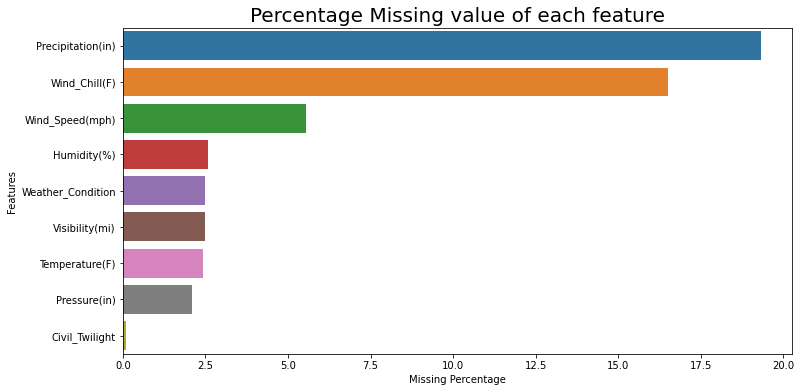

In [ ]:
df.replace("", float("NaN"), inplace=True)
df.replace(" ", float("NaN"), inplace=True)
 
missing = df.isna().sum() / df.shape[0] * 100   # Converting counts to percentage
missing_df = pd.DataFrame(missing.sort_values(ascending=False), columns=['Missing Percentage'])
missing_df = missing_df[missing_df['Missing Percentage'] > 0]

plt.figure(figsize=(12, 6)) # Set the figure size
ax = sns.barplot(y = missing_df.index, x = "Missing Percentage", data = missing_df, orient="h")
ax.set_title("Percentage Missing value of each feature", fontsize = 20)
ax.set_ylabel("Features")

In [ ]:
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(0) # Replacing nan values in precipitation with 0 because it is written in the source file that missing values in precipitation means zero
df = df.dropna().reset_index(drop = True)   # Dropping all nan values
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True) # Dropping duplicate rows

In [ ]:
df[["Date","Time"]] = df["Start_Time"].str.split(' ',2, expand=True)    # Splitting Time
df[["Year","Month","Day"]] = df["Date"].str.split('-',3, expand=True)   # Splitting Date
df['Start_Time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')    # Converting Time to Standard Scale
df['Hours'] = (df['Start_Time'].dt.hour * 60 + df['Start_Time'].dt.minute) / 60 # Calculating time in Hours
df["Week"] = df["Start_Time"].dt.day_name() # Getting day name
df['Date'] = pd.to_datetime(df['Date'])     # Standardizing date
df["State_Name"]=df.State


In [ ]:
df["State_Name"]=df.State
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

us_state_to_abbrev = dict(map(reversed, us_state_to_abbrev.items()))
df = df.replace({"State_Name":us_state_to_abbrev})
df

,Severity,Start_Time,Distance(mi),County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Date,Time,Year,Month,Day,Hours,Week,State_Name
0,3,2016-02-08 00:37:08,3.230,Franklin,OH,42.1,36.1,58.0,29.76,10.0,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016-02-08,00:37:08,2016,02,08,0.616667,Monday,Ohio
1,3,2016-02-08 07:53:43,0.500,Hamilton,OH,37.0,29.8,93.0,29.69,10.0,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,2016-02-08,07:53:43,2016,02,08,7.883333,Monday,Ohio
2,2,2016-02-08 08:16:57,1.427,Clermont,OH,35.6,29.2,100.0,29.66,10.0,8.1,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Day,2016-02-08,08:16:57,2016,02,08,8.266667,Monday,Ohio
3,2,2016-02-08 11:51:46,0.521,Cuyahoga,OH,33.1,30.0,92.0,29.63,0.5,3.5,0.08,Snow,False,False,False,False,True,False,False,False,False,False,False,False,Day,2016-02-08,11:51:46,2016,02,08,11.850000,Monday,Ohio
4,2,2016-02-08 14:19:57,0.491,Allen,OH,39.0,31.8,70.0,29.59,10.0,11.5,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Day,2016-02-08,14:19:57,2016,02,08,14.316667,Monday,Ohio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193767,2,2019-08-23 18:03:25,0.543,Riverside,CA,86.0,86.0,40.0,28.92,10.0,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Day,2019-08-23,18:03:25,2019,08,23,18.050000,Friday,California
2193768,2,2019-08-23 19:11:30,0.338,San Diego,CA,70.0,70.0,73.0,29.39,10.0,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Day,2019-08-23,19:11:30,2019,08,23,19.183333,Friday,California
2193769,2,2019-08-23 19:00:21,0.561,Orange,CA,73.0,73.0,64.0,29.74,10.0,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,Day,2019-08-23,19:00:21,2019,08,23,19.000000,Friday,California
2193770,2,2019-08-23 19:00:21,0.772,Los Angeles,CA,71.0,71.0,81.0,29.62,10.0,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Day,2019-08-23,19:00:21,2019,08,23,19.000000,Friday,California


In [ ]:
df = df.drop(columns=['Start_Time','County','Day'])

In [ ]:
#df.to_csv('/drive/MyDrive/Colab Notebooks/US_Accidents/Final_Data.csv', index=False) #save this df as the file to use for further use